In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [26]:
train_data = pd.read_csv('train_file.csv', parse_dates = ['Application Date','Issue Date','Final Date','Expiration Date'])
test_data = pd.read_csv('test_file.csv', parse_dates = ['Application Date','Issue Date','Final Date','Expiration Date'])
test_IDS = test_data['Application/Permit Number']
n_train_data = train_data.shape[0]
n_test_data = test_data.shape[0]
data = pd.concat([train_data,test_data], sort=False)
del data['Application/Permit Number']
del data['Location']
del data['Permit and Complaint Status URL']
print(data.shape)
print(n_train_data)
print(n_test_data)

(55899, 16)
33539
22360


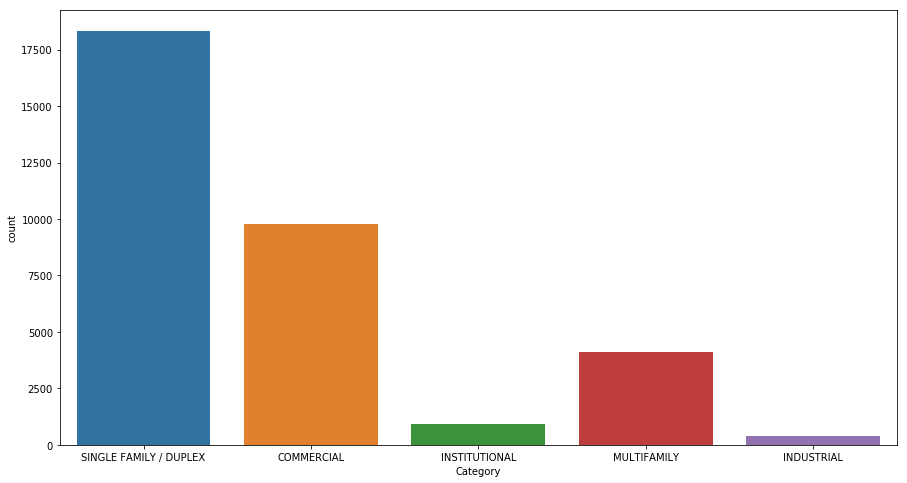

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data['Category'])

In [28]:
data.head()

Permit Type               Address  \
0  Construction       1924 10TH AVE E   
1  Construction  9434 DELRIDGE WAY SW   
2  Construction       535 TERRY AVE N   
3    Demolition         830 4TH AVE S   
4  Construction       805 NE 106TH ST   

                                         Description Action Type  \
0  Alterations to single family residence, (porti...     ADD/ALT   
1  Change use permit from restaurant to residenti...     ADD/ALT   
2  Construct interior alterations to existing off...     ADD/ALT   
3  need to remove a fire escape that is not part ...  DEMOLITION   
4  Channel modification to Thornton Creek, stream...     ADD/ALT   

        Work Type      Applicant Name Application Date Issue Date Final Date  \
0  No plan review        ZHANG, JERRY       2018-01-16 2018-01-16        NaT   
1     Plan Review       MARTIN, TERRY       2015-02-13 2015-04-16 2016-11-15   
2  No plan review  ALLEXSAHT, REBECCA       2014-09-04 2014-09-04 2015-11-20   
3     Plan Review         JUNK, FRANK              NaT        NaT        NaT   
4     Plan Review        DANIEL, MARK       2013-05-02 2013-12-19 2015-05-14   

  Expiration Date                         Status              Contractor  \
0      2019-07-16                  Permit Issued                     NaN   
1      2016-10-16                  Permit Closed                     NaN   
2      2016-03-04                  Permit Closed  IA/INTERIOR ARCHITECTS   
3             NaT  Initial Information Collected                     NaN   
4      2015-06-19                  Permit Closed      SEATTLE PARKS DEPT   

   Master Use Permit   Latitude   Longitude                Category  
0                NaN  47.636732 -122.319828  SINGLE FAMILY / DUPLEX  
1                NaN  47.518298 -122.355555              COMMERCIAL  
2                NaN  47.624025 -122.337567              COMMERCIAL  
3                NaN  47.595020 -122.328530              COMMERCIAL  
4                NaN  47.705686 -122.320134              COMMERCIAL

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55899 entries, 0 to 22359
Data columns (total 16 columns):
Permit Type          55899 non-null object
Address              55864 non-null object
Description          55878 non-null object
Action Type          54640 non-null object
Work Type            55899 non-null object
Applicant Name       55679 non-null object
Application Date     44463 non-null datetime64[ns]
Issue Date           38334 non-null datetime64[ns]
Final Date           26087 non-null datetime64[ns]
Expiration Date      38415 non-null datetime64[ns]
Status               53290 non-null object
Contractor           10151 non-null object
Master Use Permit    7504 non-null float64
Latitude             55862 non-null float64
Longitude            55862 non-null float64
Category             33539 non-null object
dtypes: datetime64[ns](4), float64(3), object(9)
memory usage: 8.5+ MB


In [30]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

percent_missing
Permit Type               0.000000
Address                   0.062613
Description               0.037568
Action Type               2.252276
Work Type                 0.000000
Applicant Name            0.393567
Application Date         20.458327
Issue Date               31.422745
Final Date               53.331902
Expiration Date          31.277840
Status                    4.667346
Contractor               81.840462
Master Use Permit        86.575788
Latitude                  0.066191
Longitude                 0.066191
Category                 40.000716

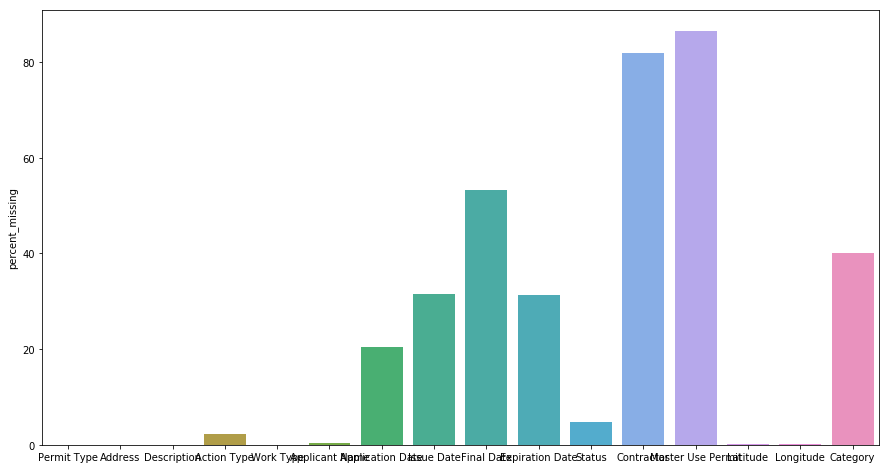

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(y = missing_value_df['percent_missing'], x = missing_value_df.index)

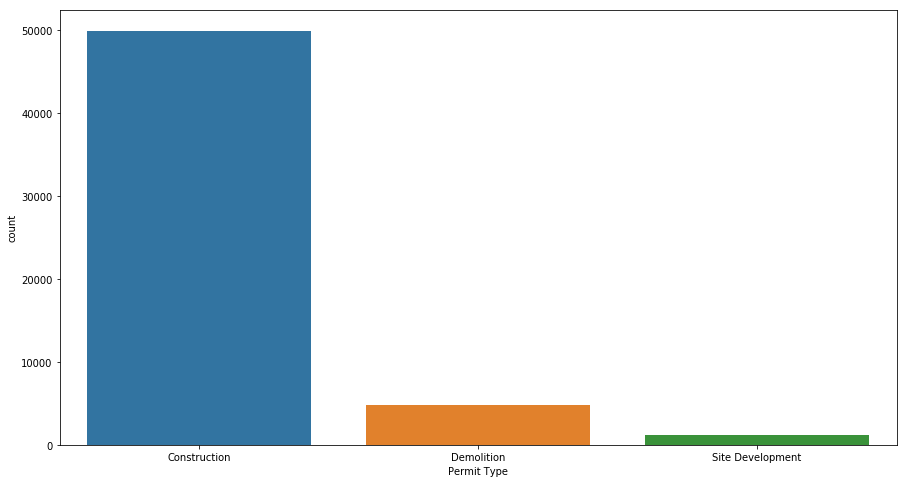

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(data['Permit Type'])

In [33]:
data = pd.get_dummies(data, columns=['Permit Type'])

In [34]:
data['Action Type'].value_counts()

ADD/ALT                          35664
NEW                              11334
DEMOLITION                        4360
ALTER                             1568
TREE/VEGETATION MAINT/RESTORE      722
GRADING                            331
TEMP                               293
NO CONSTRUCTION                    182
CURB CUT                           128
SHORELINE EXEMPTION ONLY            20
RELOCATION                          17
DECONSTRUCTION                       9
SITE MONITORING ONLY                 4
FLOODPLAIN LICENSE ONLY              3
DRAINAGE APPROVAL                    3
TREE PROTECTION EXEMPTION            2
Name: Action Type, dtype: int64

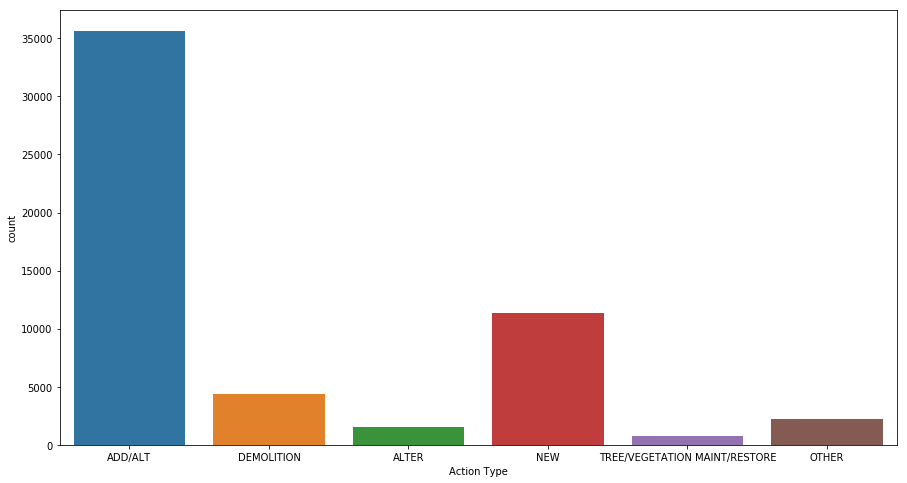

In [35]:
def process_action_type(x):
    if(x in ['ADD/ALT', 'NEW', 'DEMOLITION', 'ALTER', 'TREE/VEGETATION MAINT/RESTORE'] ):
        return x
    else:
        return 'OTHER'
    
data['Action Type'] = data['Action Type'].apply(lambda x : process_action_type(x))
plt.figure(figsize=(15,8))
sns.countplot(data['Action Type'])

In [36]:
data = pd.get_dummies(data, columns=['Action Type'])

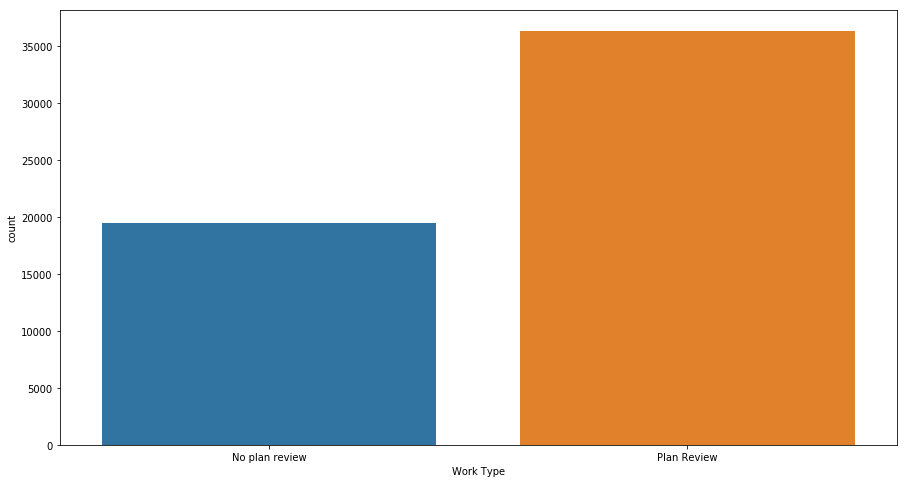

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(data['Work Type'])

In [38]:
data['Work Type'] = data['Work Type'].apply(lambda x : 1 if x=='Plan Review' else 0)

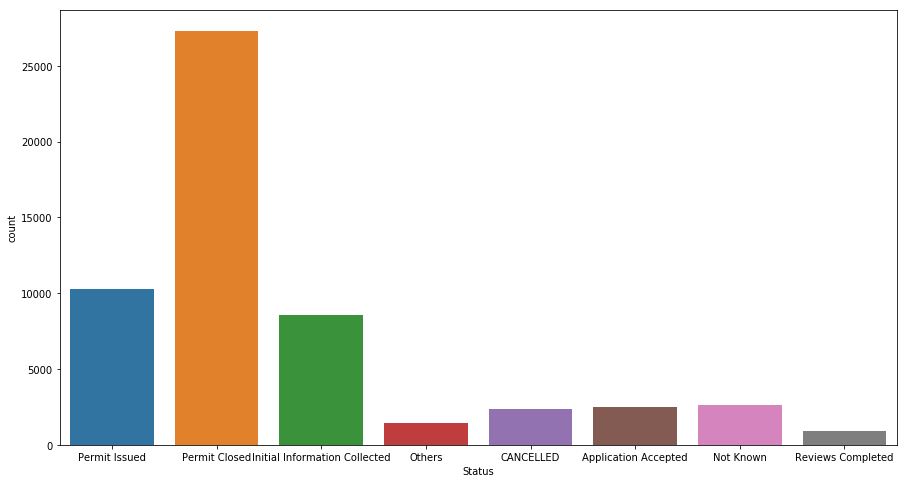

In [39]:
data['Status'] = data['Status'].fillna('Not Known')
def process_status(x):
    if(x in ["Permit Closed", "Permit Issued", "Initial Information Collected", "Not Known", "Application Accepted", "CANCELLED", "Reviews Completed"]):
        return x
    return "Others"

data['Status'] = data['Status'].apply(lambda x : process_status(x))
plt.figure(figsize=(15,8))
sns.countplot(data['Status'])
data = pd.get_dummies(data, columns=['Status'])

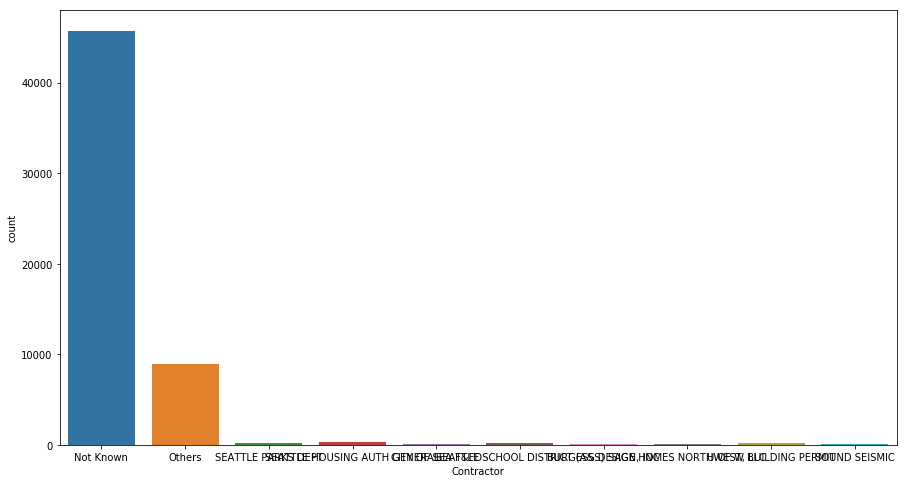

In [40]:
data['Contractor'] = data['Contractor'].fillna('Not Known')
def process_contractors(x):
    if(x in ["Not Known", "SEATTLE HOUSING AUTH GENERAL", "SEATTLE SCHOOL DISTRICT (A&S)", "U OF W BUILDING PERMIT", "SEATTLE PARKS DEPT", "CITY OF SEA F&FD", "SAGE HOMES NORTHWEST, LLC", "BURGESS DESIGN, INC", "BURGESS DESIGN, INC", "SOUND SEISMIC"]):
        return x
    return "Others"


data['Contractor'] = data['Contractor'].apply(lambda x : process_contractors(x))
plt.figure(figsize=(15,8))
sns.countplot(data['Contractor'])
data = pd.get_dummies(data, columns=['Contractor'])

In [41]:
del data['Master Use Permit']

In [42]:
data['Pos-x'] = np.cos(data['Latitude']) * np.cos(data['Longitude'])
data['Pos-y'] = np.cos(data['Latitude']) * np.sin(data['Longitude'])
data['Pos-z'] = np.sin(data['Latitude'])

data['Pos-x'] = data['Pos-x'].fillna('-1')
data['Pos-y'] = data['Pos-y'].fillna('-1')
data['Pos-z'] = data['Pos-z'].fillna('-1')

del data['Latitude']
del data['Longitude']

In [43]:
def get_address_number(x):
    try:
        add_num = np.array(x.split())[0]
        return add_num
    except:
        return x

def get_rem_address(x):
    try:
        rem_address = np.array(x.split())[1:]
        return ' '.join(rem_address)
    except:
        return x
    
data['Address Number'] = data['Address'].apply(lambda x : get_address_number(x))
data['Remaining Address'] = data['Address'].apply(lambda x : get_rem_address(x))

In [44]:
relevant_address_numbers = [x for x,y in dict(data['Address Number'].value_counts()).items() if y>100]

def process_address_number(x):
    if(x in relevant_address_numbers):
        return x
    return 'Other'

data['Address Number'] = data['Address Number'].apply(lambda x : process_address_number(x))
data = pd.get_dummies(data, columns=['Address Number'])

relevant_remaining_address = [x for x,y in dict(data['Remaining Address'].value_counts()).items() if y>300]

def process_remaining_address(x):
    if(x in relevant_remaining_address):
        return x
    return 'Other'

data['Remaining Address'] = data['Remaining Address'].apply(lambda x : process_remaining_address(x))
data = pd.get_dummies(data, columns=['Remaining Address'])

del data['Address']

In [45]:
data['Application-Issue'] = data['Issue Date'].sub(data['Application Date'], axis=0)
data['Application-Issue'] = data['Application-Issue'] / np.timedelta64(1, 'D')

data['Issue-Final'] = data['Final Date'].sub(data['Issue Date'], axis=0)
data['Issue-Final'] = data['Issue-Final'] / np.timedelta64(1, 'D')

data['Issue-Expiration'] = data['Expiration Date'].sub(data['Issue Date'], axis=0)
data['Issue-Expiration'] = data['Issue-Expiration'] / np.timedelta64(1, 'D')

In [46]:
data['Application-Issue'] = data['Application-Issue'].fillna(data['Application-Issue'].mean())
data['Issue-Final'] = data['Issue-Final'].fillna(data['Issue-Final'].mean())
data['Issue-Expiration'] = data['Issue-Expiration'].fillna(data['Issue-Expiration'].mean())

In [47]:
del data['Issue Date']
del data['Application Date']
del data['Final Date']
del data['Expiration Date']

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data['Application-Issue'] = sc.fit_transform(data[['Application-Issue']])
data['Issue-Final'] = sc.fit_transform(data[['Issue-Final']])
data['Issue-Expiration'] = sc.fit_transform(data[['Issue-Expiration']])

In [49]:
import nltk                                         
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer                 
from sklearn.feature_extraction.text import TfidfVectorizer          
from gensim.models import Word2Vec 
import re

In [51]:
descriptions = data['Description']

In [52]:
temp =[]
snow = nltk.stem.SnowballStemmer('english')
for sentence in descriptions:
    try:
        sentence = sentence.lower()                 # Converting to lowercase
        cleanr = re.compile('<.*?>')
        sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
        sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
        words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
        temp.append(words)
    except:
        temp.append('Empty')
    
descriptions = temp 

In [53]:
temp = []

for row in descriptions:
    sentence = " ".join(row)
    temp.append(sentence)
    
descriptions = temp

In [54]:
tf_idf = TfidfVectorizer(max_features = 500)
descriptions = tf_idf.fit_transform(descriptions)

In [55]:
descriptions = descriptions.todense()

In [56]:
del data['Description']
del data['Applicant Name']

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, chi2

In [59]:
train_data = data.iloc[:n_train_data]
test_data = data.iloc[n_train_data:]

del test_data['Category']

print(train_data.shape)
print(test_data.shape)

(33539, 70)
(22360, 69)


In [60]:
le = LabelEncoder()
train_data['Category'] = le.fit_transform(train_data['Category'])

In [61]:
train_y = train_data['Category']
del train_data['Category']
train_X = train_data

test_X = test_data

In [69]:
model = ExtraTreeClassifier()
model.fit(train_X,train_y)
feature_imp = pd.DataFrame({'Feature' : train_X.columns, 'Score' : model.feature_importances_})
feature_imp.sort_values(by=['Score'], ascending=False)

Feature     Score
29                                     Pos-y  0.211136
28                                     Pos-x  0.197627
30                                     Pos-z  0.194764
66                         Application-Issue  0.059244
67                               Issue-Final  0.056346
68                          Issue-Expiration  0.044213
54                      Address Number_Other  0.035385
20                      Contractor_Not Known  0.020803
0                                  Work Type  0.019976
63                   Remaining Address_Other  0.019492
4                        Action Type_ADD/ALT  0.017572
57                 Remaining Address_3RD AVE  0.011555
12      Status_Initial Information Collected  0.008007
59                 Remaining Address_5TH AVE  0.007944
5                          Action Type_ALTER  0.007567
8                          Action Type_OTHER  0.006583
56                 Remaining Address_2ND AVE  0.006451
15                      Status_Permit Closed  0.006307
7                            Action Type_NEW  0.005980
60            Remaining Address_AURORA AVE N  0.004886
21                         Contractor_Others  0.004316
55               Remaining Address_1ST AVE S  0.003909
65          Remaining Address_WESTLAKE AVE N  0.003791
16                      Status_Permit Issued  0.003352
6                     Action Type_DEMOLITION  0.002953
11                          Status_CANCELLED  0.002807
61       Remaining Address_CALIFORNIA AVE SW  0.002380
25  Contractor_SEATTLE SCHOOL DISTRICT (A&S)  0.002375
64           Remaining Address_RAINIER AVE S  0.002068
2                     Permit Type_Demolition  0.002039
..                                       ...       ...
24             Contractor_SEATTLE PARKS DEPT  0.001166
49                        Address Number_700  0.001058
1                   Permit Type_Construction  0.000966
58                 Remaining Address_4TH AVE  0.000846
17                  Status_Reviews Completed  0.000743
46                        Address Number_505  0.000657
33                       Address Number_1100  0.000632
3               Permit Type_Site Development  0.000607
52                        Address Number_900  0.000588
31                       Address Number_1000  0.000525
45                        Address Number_500  0.000522
18            Contractor_BURGESS DESIGN, INC  0.000462
43                        Address Number_400  0.000452
34                       Address Number_1101  0.000427
32                       Address Number_1001  0.000397
53                        Address Number_901  0.000383
41                        Address Number_201  0.000367
35                       Address Number_1111  0.000345
19               Contractor_CITY OF SEA F&FD  0.000326
38                       Address Number_1301  0.000323
40                       Address Number_2001  0.000283
50                        Address Number_701  0.000256
42                        Address Number_300  0.000209
44                        Address Number_401  0.000204
27         Contractor_U OF W BUILDING PERMIT  0.000195
36                       Address Number_1200  0.000188
37                       Address Number_1201  0.000184
39                       Address Number_1501  0.000170
47                        Address Number_600  0.000137
51                        Address Number_800  0.000129

[69 rows x 2 columns]

In [70]:
train_X = np.hstack((train_X.values,descriptions[:n_train_data]))
test_X = np.hstack((test_X.values, descriptions[n_train_data:]))
print(train_X.shape)
print(test_X.shape)

(33539, 569)
(22360, 569)


In [76]:
dt = DecisionTreeClassifier()

scores = cross_validate(dt, train_X, train_y, cv=2, scoring=make_scorer(f1_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.82090987 0.82598196]
0.8234459136727885


In [73]:
et = ExtraTreeClassifier()

scores = cross_validate(et, train_X, train_y, cv=2, scoring=make_scorer(f1_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.79422716 0.80310131]
0.7986642344039008


In [74]:
mlp = MLPClassifier()

scores = cross_validate(mlp, train_X, train_y, cv=2, scoring=make_scorer(f1_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.8597745  0.85927436]
0.8595244310664523


In [71]:
rf = RandomForestClassifier(n_estimators=200)

scores = cross_validate(rf, train_X, train_y, cv=2, scoring=make_scorer(f1_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.8670596  0.87056838]
0.8688139902217635


In [72]:
gb = GradientBoostingClassifier(n_estimators=200)

scores = cross_validate(gb, train_X, train_y, cv=2, scoring=make_scorer(f1_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.87745377 0.87784918]
0.8776514720276071


In [75]:
xgb = XGBClassifier(n_estimators=200)

scores = cross_validate(xgb, train_X, train_y, cv=2, scoring=make_scorer(f1_score, average='weighted'))
print(scores['test_score'])
print(np.mean(scores['test_score']))

[0.87544691 0.87620012]
0.8758235135417374


In [77]:
clf =  gb

In [78]:
clf.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
pred = clf.predict(test_X)
predictions = le.inverse_transform(pred)

In [80]:
out = pd.DataFrame({'Application/Permit Number' : test_IDS, 'Category' : predictions})
out.head()

Application/Permit Number                Category
0                    6425384  SINGLE FAMILY / DUPLEX
1                    6496502  SINGLE FAMILY / DUPLEX
2                    6622347  SINGLE FAMILY / DUPLEX
3                    6565685  SINGLE FAMILY / DUPLEX
4                    6487370              COMMERCIAL

In [81]:
out.to_csv('Sub.csv', index=False)